<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

# **Project Title: Enhancing Convolutional Neural Network Performance on CIFAR-100**

---

**Objective:** The primary objective of this project is to analyze and improve the performance of a provided weak convolutional neural network (CNN) model on the CIFAR-100 dataset. The goal is to exceed a baseline accuracy of 44% within 15 training epochs.

**Baseline Model:**
- Provided notebook: `FinalProj23.ipynb`
- Dataset: CIFAR-100 (32x32 color images, 100 classes)
- Split: 90% Training, 10% Validation
- Baseline Accuracy Target: 44%

**Methodology:**
1. **Baseline Evaluation:**
   - Run the provided CNN model to establish baseline performance.
   - Analyze baseline results including best and worst class accuracy.

2. **Improvement Strategies:**
   - Refining the CNN Structure for Enhanced Performance on CIFAR-100 Dataset
   - Implement advanced techniques like snapshot ensembling to improve model robustness.
   - Experiment with different hyperparameters, activation functions, and optimization strategies.
   - Evaluate the impact of each change on model performance.

3. **Training Environment:**
   - Utilize GPU acceleration for efficient training.

4. **Performance Metrics:**
   - Overall accuracy improvement over 15 epochs.
   - Best-class and worst-class accuracy.
   - Impact of snapshot ensembling on the results.

5. **Documentation:**
   - Provide a comprehensive explanation of the modifications and their rationale.
   - Detail the final architecture and training process.
   - Include visualizations of performance metrics.

6. **External Resources:**
   - Cite any external sources used for guidance or code.

7. **Results and Discussion:**
   - Present final model accuracy and compare it to the baseline.
   - Discuss what worked and what did not, and possible reasons.

**Grading Criteria:**
- Clear explanation of strategies and their rationale.
- Improvement in accuracy over the baseline.
- Use of snapshot ensembling and its impact.
- Quality of documentation and code clarity.
- Originality and effectiveness of implemented strategies.
- Credit given to external sources if used.

**Additional Notes:** The best accuracy in class will contribute additional points to the overall grade.

**Prediction Testing:** Test the final model using `model.predict(ds_test)` and analyze the predictions.

</div>



<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

## **Setup**

</div>

In [ ]:
import subprocess
import sys

# List of libraries to install
libraries = [
    'numpy', 
    'tensorflow', 
    'matplotlib', 
    'tensorflow_datasets',
    'matplotlib',
    'os',
    'random',
    'math',
    'keras-tuner',

]

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

for lib in libraries:
    try:
        __import__(lib)
        print(f"{lib} is already installed.")
    except ImportError:
        print(f"{lib} is not installed. Installing...")
        install(lib)
        print(f"{lib} successfully installed.")


# Importing libraries
import numpy as np
import random
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow.keras as tfk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import sys



# Set the seed for TensorFlow
tf.random.set_seed(42)

# Set the seed for Numpy
np.random.seed(42)

# Set the seed for Python (used in built-in Python operations like random.shuffle)
random.seed(42)



def configure_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Here we set the GPU to be exclusively used by this process
            tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
            # Setting the GPU memory growth to True
            tf.config.experimental.set_memory_growth(gpus[0], True)
            print("Using GPU:", gpus[0])
        except RuntimeError as e:
            # This is likely to be raised when the GPU setting is done after TensorFlow operations
            print(e)

# Configure GPU first
configure_gpu()


numpy is already installed.
tensorflow is already installed.
matplotlib is already installed.
tensorflow_datasets is already installed.
matplotlib is already installed.
os is already installed.
random is already installed.
keras-tuner is not installed. Installing...
keras-tuner successfully installed.
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

## **1. Baseline Evaluation**

</div>

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        1849

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


352/352 [==============================] - ETA: 0s - loss: 2.8115 - accuracy: 0.3019
Epoch 2: val_accuracy improved from 0.24440 to 0.31680, saving model to cifar100_best_ckeckpt.h5
352/352 [==============================] - 6s 17ms/step - loss: 2.8115 - accuracy: 0.3019 - val_loss: 2.7232 - val_accuracy: 0.3168
Epoch 3/15
350/352 [============================>.] - ETA: 0s - loss: 2.4464 - accuracy: 0.3766
Epoch 3: val_accuracy did not improve from 0.31680
352/352 [==============================] - 6s 16ms/step - loss: 2.4466 - accuracy: 0.3765 - val_loss: 2.7980 - val_accuracy: 0.3098
Epoch 4/15
349/352 [============================>.] - ETA: 0s - loss: 2.2108 - accuracy: 0.4282
Epoch 4: val_accuracy improved from 0.31680 to 0.32900, saving model to cifar100_best_ckeckpt.h5
352/352 [==============================] - 6s 16ms/step - loss: 2.2110 - accuracy: 0.4284 - val_loss: 2.6868 - val_accuracy: 0.3290
Epoch 5/15
351/352 [============================>.] - ETA: 0s - loss: 2.0275 - acc

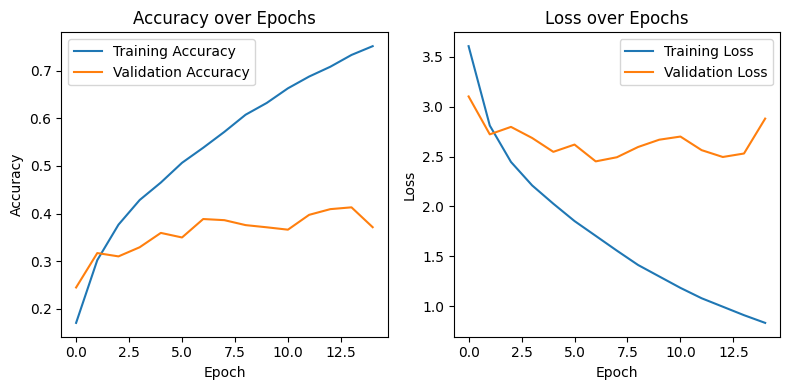

In [4]:
'''
Some code modified from that provided by Daniel Sawyer.  This implementation
is done with functions for a different look.  You do not have to use it.
You will work with cifar100 as set up here (in terms of train, validation
and test).  This is color images of size 32x32 of 100 classes. Hence, 3
chanels R, G, B.    I took out 10% for validation.
You can change this around, but must be very clear on what was done and why.
You must improve on 44% accuracy (which is a fairly low bar).  You need to
provide a best class accuracy and worst class accuracy. To improve, more epochs
can help, but that cannot be the only change you make.  You should show  better
performance at 15 epochs or argue why it is not possible.  You can add layers,
subtract layers (though you have 100 classes). You need to report on the number
of examples.

I also want you to use a snapshot ensemble of at least 5 snapshots.  One
way to choose the best class is to sum the per class outputs and take the
maximum.  Another is to vote for the class and break ties in some way.
Indicate if results are better or worse or the same. (This is 5
extra credit points of the grade).

You must clearly explain what you tried and why and what seemed to work
and what did not.  That will be the major part of your grade.  Higher
accuracy will also improve your grade. If you use an outside source, it
must be disclosed and that source may be credited with part of the grade.
 The best accuracy in class will add
3 points to their overall average grade, second best 2 points and 3rd best
 1 point.

To get predictions:
predictions=model.predict(ds_test)
Prints the first test predition and you will see 100 predictions
print(predictions[0])

'''

def loadmycifar100():
  # cifar100 has 2 sets of labels.  The default is "label" giving you 100
  # predictions for the classes
  (ds_train, dsvalid, ds_test), ds_info = tfds.load(
    'cifar100',
# First 35% and last 55% from training, then validation data is 10%
# from 35% of train data to 41+% and test is the usual 10K
    split=['train[:35%]+train[-55%:]','train[35%:45%]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
#tf.keras.datasets.cifar100.load_data(label_mode="fine")


#  ds_train = ds_train.map(
#    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  ds_train = ds_train.cache()
  ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
  ds_train = ds_train.batch(128)
  ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

#  ds_test = ds_test.map(
#    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  ds_test = ds_test.batch(128)
  ds_test = ds_test.cache()
  ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)


#  dsvalid = dsvalid.map(
#    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
  dsvalid = dsvalid.batch(64)
  dsvalid = dsvalid.cache()
  dsvalid = dsvalid.prefetch(tf.data.experimental.AUTOTUNE)
  return ds_train, dsvalid, ds_test

def main():
    # Checks if runs arg was passed.  If you want to auto run multiple times
    '''
	if len(sys.argv) > 1:
		runs = int(sys.argv[1])
	else:
		runs = 3
    '''
# Loads data
    (ds_train, dsvalid, ds_test) = loadmycifar100()
    epochs = 15
# Callback for saving best epoch checkpoint weights
    model_path = 'cifar100_best_ckeckpt.h5'
    checkpoint = tfk.callbacks.ModelCheckpoint(
			filepath=model_path,
			monitor='val_accuracy',
			verbose=1,
			save_best_only=True
		)
    callbacks = [checkpoint]
    # Input shape and layer.  This is rgb
    input_shape = (32, 32, 3)
    input_layer = tfk.layers.Input(shape=input_shape)

    # First convolution, batch norm
    ly = tfk.layers.Conv2D(32, 3)(input_layer)
    ly = tfk.layers.BatchNormalization()(ly)
    ly = tfk.layers.Activation('relu')(ly)

    ly = tfk.layers.MaxPooling2D()(ly)

    # Second convolution, batch norm
    ly = tfk.layers.Conv2D(64, 3)(ly)
    ly = tfk.layers.BatchNormalization()(ly)
    ly = tfk.layers.Activation('relu')(ly)


    # Max pooling layer and flattens for dense layers
    ly = tfk.layers.MaxPooling2D()(ly)
    ly = tfk.layers.Flatten()(ly)

    # First dense layer with batch norm & dropout
    ly = tfk.layers.Dense(512)(ly)
    ly = tfk.layers.BatchNormalization()(ly)
    ly = tfk.layers.Activation('relu')(ly)
    ly = tfk.layers.Dropout(0.5)(ly)

    # Output dense layer, 100 classes
    ly = tfk.layers.Dense(100)(ly)
    output_layer = tfk.layers.Activation('softmax')(ly)

    # Compiles model with adam optimizer
    model = tfk.Model(input_layer, output_layer)
    opt = tfk.optimizers.Adam(learning_rate=0.001)
    model.compile(
	  	loss='sparse_categorical_crossentropy',
			optimizer=opt,
			metrics=['accuracy']
      )

    # Prints model summary
    model.summary()

    # Trains model with increased epochs and saves best
    history = model.fit(
			ds_train,
			epochs=epochs,
			validation_data=dsvalid,
			callbacks=callbacks
      )

    # Load best model weights from checkpoint and save results
    model.load_weights(model_path)
    _, test_acc = model.evaluate(ds_test)
    print(f"Test accuracy: {test_acc*100:.2f}%")
    
    # Prints results
    # print("Results ")
    # print(res)

    # Plotting accuracy graphs
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss graphs
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


# When called run main
if __name__ == '__main__':
	main()


<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

The provided graphs display the accuracy and loss of a model over epochs during training. From the graphs, we can make several observations:

1. **Training Accuracy**:
   - The training accuracy is steadily increasing with each epoch, which indicates that the model is learning and improving its performance on the training set.
   - However, the continuous increase without leveling off suggests that the model might not have reached its full potential within the given epochs, and might benefit from additional training.

2. **Validation Accuracy**:
   - The validation accuracy is significantly lower than the training accuracy, which typically suggests overfitting. The model performs well on the training data but is not generalizing as well to unseen data.
   - There is a slight increase in validation accuracy, but it appears to plateau early, which may indicate that the model has limited learning from the validation set.

3. **Training Loss**:
   - The training loss decreases sharply and continues to decline, which corresponds with the increase in training accuracy.
   - The steady decline in loss is a good sign that the model is minimizing the error in its predictions on the training set.

4. **Validation Loss**:
   - The validation loss decreases initially but then fluctuates and even increases slightly towards the later epochs.
   - This fluctuation can be a sign of the model's struggle to generalize the patterns learned from the training set to the validation set.

The final training results of the convolutional neural network on the CIFAR-100 dataset indicate that the accuracy on the test set is approximately 41.72%. This is below the established target accuracy of 44%, which means that the current model has not yet achieved the desired performance. Therefore, improvements must be implemented to exceed this target.
</div>

<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

## **2. Improvement Strategies**

</div>

  <div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

   - **Refining the CNN Structure for Enhanced Performance on CIFAR-100 Dataset**

In this code, we will modify the architecture of a Convolutional Neural Network (CNN) to improve its performance on the CIFAR-100 dataset, which consists of 100 different classes. The proposed changes are made considering the complexity of these classes and aim to achieve significant improvement within just 15 epochs of training.

Summary of steps and modifications in the code:

1. **Learning Rate Scheduling:**
   - We implement a learning rate schedule that reduces the rate at specific epoch intervals, allowing for rapid initial learning and more refined weight adjustments as training progresses.

2. **Model Construction:**
   - We build a CNN with three convolutional blocks, each featuring batch normalization and activation layers before the convolution (pre-activation), followed by MaxPooling and Dropout layers. Dropout rates increase as the network deepens to combat overfitting.
   - We increase the filter size in the first convolutional layer to capture broader spatial information.
   - The network concludes with dense layers and an output layer with softmax activation for classification into 100 classes.

3. **Model Compilation:**
   - The model is compiled using sparse categorical cross-entropy loss function and the Adam optimizer, starting with a defined learning rate.

4. **Callbacks:**
   - We use callbacks for saving the best model (ModelCheckpoint), early stopping if validation loss does not improve (EarlyStopping), and adjusting the learning rate during training (LearningRateScheduler).

5. **Model Training:**
   - The model is trained on the training and validation datasets, using the defined callbacks, for 15 epochs.

These modifications aim to explore the network's capacity to learn complex discriminative features within a limited number of epochs, providing a balance between adaptability, regularization, and computational efficiency.

---

</div>

Learning rate:  0.001
Epoch 1/15


2023-12-02 12:55:35.583575: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1014] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


352/352 [==============================] - 13s 27ms/step - loss: 4.1459 - accuracy: 0.0758 - val_loss: 4.0061 - val_accuracy: 0.1022 - lr: 0.0010
Learning rate:  0.001
Epoch 2/15
352/352 [==============================] - 9s 24ms/step - loss: 3.5994 - accuracy: 0.1568 - val_loss: 3.2164 - val_accuracy: 0.2242 - lr: 0.0010
Learning rate:  0.001
Epoch 3/15
352/352 [==============================] - 8s 24ms/step - loss: 3.2689 - accuracy: 0.2136 - val_loss: 3.0450 - val_accuracy: 0.2490 - lr: 0.0010
Learning rate:  0.001
Epoch 4/15
352/352 [==============================] - 8s 24ms/step - loss: 3.0178 - accuracy: 0.2592 - val_loss: 2.8848 - val_accuracy: 0.2842 - lr: 0.0010
Learning rate:  0.001
Epoch 5/15
352/352 [==============================] - 8s 24ms/step - loss: 2.8431 - accuracy: 0.2900 - val_loss: 2.7513 - val_accuracy: 0.3116 - lr: 0.0010
Learning rate:  0.001
Epoch 6/15
352/352 [==============================] - 8s 23ms/step - loss: 2.6944 - accuracy: 0.3200 - val_loss: 2.8494 

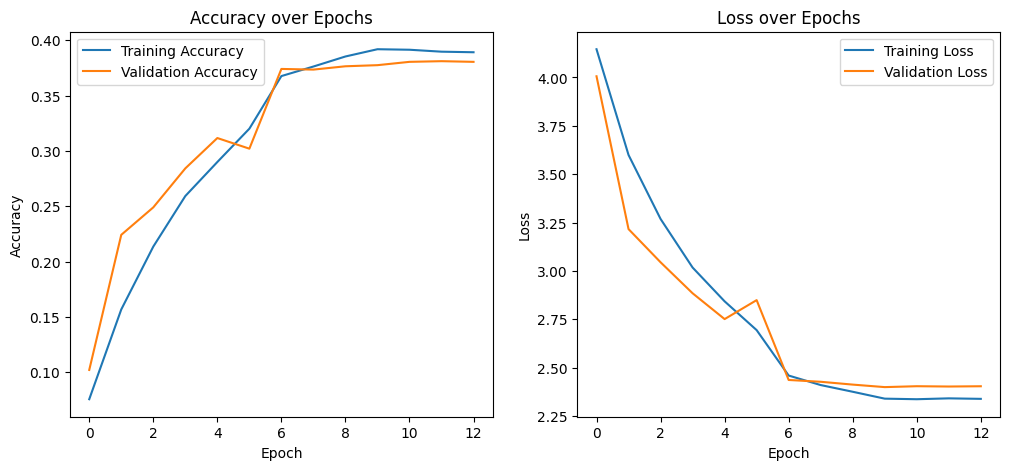

In [5]:
# Load the Dataset
(ds_train, ds_valid, ds_test) = loadmycifar100()

def lr_schedule(epoch):
    """ Learning Rate Schedule
    Learning rate is scheduled to be reduced after 10, 12 epochs.
    """
    lr = 0.001
    if epoch > 12:
        lr *= 0.5e-3
    elif epoch > 10:
        lr *= 1e-3
    elif epoch > 8:
        lr *= 1e-2
    elif epoch > 5:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

def build_model(input_shape):
    inputs = Input(shape=input_shape)

    # First Convolutional Block with larger filters and pre-activation layers
    x = BatchNormalization()(inputs)
    x = Activation('relu')(x)
    x = Conv2D(filters=32, kernel_size=(5, 5), padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    # Second Convolutional Block
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.3)(x)

    # Third Convolutional Block
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=128, kernel_size=(3, 3), padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.4)(x)

    # Flatten and Dense Layers
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Output Layer
    outputs = Dense(100, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Compile the Model
model = build_model((32, 32, 3))
opt = Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Callbacks
checkpoint_cb = ModelCheckpoint('cifar100_best_model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)
lr_scheduler_cb = LearningRateScheduler(lr_schedule)

# Train the Model
history = model.fit(ds_train, epochs=15, validation_data=ds_valid,
                    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler_cb])

# Evaluate the Model
model.load_weights('cifar100_best_model.h5')
test_loss, test_acc = model.evaluate(ds_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# Plot Accuracy and Loss Graphs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


  <div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">


The graphs show the accuracy and loss of a neural network over epochs during its training and validation phases.

1. **Accuracy over Epochs:**
   - Both the training and validation accuracy increase sharply until around epoch 5, after which both curves begin to plateau.
   - The training and validation accuracies are closely aligned throughout the training process, which is generally a good sign that the model is not overfitting. This indicates that the model is generalizing well to unseen data.

2. **Loss over Epochs:**
   - The training loss decreases rapidly, which is typical and expected as the model begins to fit to the training data.
   - The validation loss decreases alongside the training loss until around epoch 5, after which it shows a slight increase before plateauing. This slight increase followed by a plateau might indicate the beginning of overfitting; however, the effect here seems to be minimal.

Some conclusions and considerations from these observations:

- **Convergence:** The model seems to converge around epoch 5, which is where the accuracy starts to plateau and the validation loss shows minimal increases.
- **Early Stopping:** Given the convergence around epoch 5, an early stopping mechanism might be beneficial to prevent unnecessary computations in future training runs.
- **Overfitting:** There is no significant evidence of overfitting, as the validation accuracy and loss are closely following the training accuracy and loss. However, monitoring for overfitting is essential as training continues beyond the plateau.
- **Further Improvement:** Since the model's accuracy is plateauing at a relatively low value (under 40%), this suggests there is room for improvement. This might include further hyperparameter tuning, experimenting with more complex architectures, or techniques such as data augmentation or regularization to improve the model's ability to generalize.

The model's performance could likely be improved by refining the architecture or training process to address the observed plateau in accuracy and loss.

---

</div>

<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

- **Implement advanced techniques like snapshot ensembling to improve model robustness.**

The folowing code is a training routine for a Convolutional Neural Network (CNN) for the CIFAR-100 dataset using TensorFlow. Here are the key functions and steps of the code:

1. **Data Loading and Preparation (`loadmycifar100`):**
   - Loads the CIFAR-100 dataset, splitting it into training, validation, and test sets.
   - Applies data optimization techniques like caching and prefetching to speed up training.

2. **Snapshot Ensemble Callback (`SnapshotEnsembleCallback`):**
   - Defines a custom TensorFlow callback that saves snapshots of the model at specific intervals during training (determined by the snapshot frequency).
   - Adjusts the learning rate over time following a cyclical schedule, which can help improve model convergence.

3. **Model Construction (`build_model`):**
   - Builds the CNN architecture using convolutional layers, batch normalization, ReLU activation, max pooling, flattening, and dense layers for final classification.
   - Compiles the model with categorical cross-entropy loss and the Adam optimizer.

4. **Model Training:**
   - Uses the model and datasets to train the CNN, with a checkpoint callback to save the best model and the snapshot ensemble callback to enhance robustness.

5. **Evaluation and Visualization (`plot_history`):**
   - Loads the best saved model after training and evaluates its accuracy on the test set.
   - Plots graphs of training and validation accuracy and loss over epochs for visualization of model performance.


---

</div>


Epoch 1/15
350/352 [============================>.] - ETA: 0s - loss: 3.5824 - accuracy: 0.1756
Epoch 1: val_accuracy improved from -inf to 0.26520, saving model to cifar100_best_model_snapshot.h5
352/352 [==============================] - 10s 18ms/step - loss: 3.5801 - accuracy: 0.1760 - val_loss: 2.9886 - val_accuracy: 0.2652
Epoch 2/15
350/352 [============================>.] - ETA: 0s - loss: 2.8406 - accuracy: 0.2957
Epoch 2: val_accuracy improved from 0.26520 to 0.31440, saving model to cifar100_best_model_snapshot.h5
352/352 [==============================] - 6s 17ms/step - loss: 2.8407 - accuracy: 0.2954 - val_loss: 2.7684 - val_accuracy: 0.3144
Epoch 3/15
349/352 [============================>.] - ETA: 0s - loss: 2.6830 - accuracy: 0.3314
Epoch 3: val_accuracy improved from 0.31440 to 0.33440, saving model to cifar100_best_model_snapshot.h5
352/352 [==============================] - 6s 17ms/step - loss: 2.6832 - accuracy: 0.3313 - val_loss: 2.6786 - val_accuracy: 0.3344
Epoch 

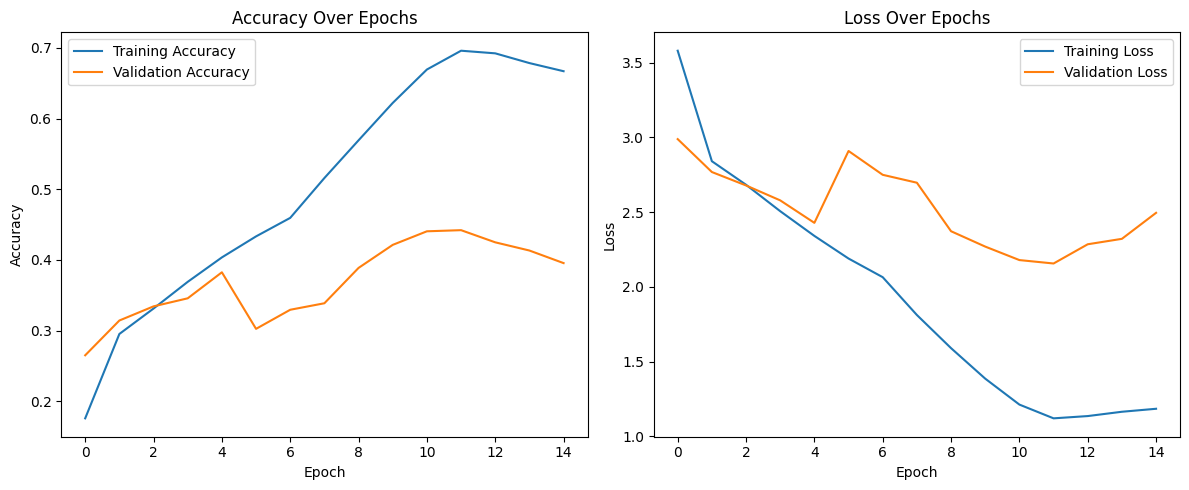

In [10]:
# Load and prepare the CIFAR100 dataset
def loadmycifar100():
    (ds_train, ds_valid, ds_test), ds_info = tfds.load(
        'cifar100',
        split=['train[:35%]+train[-55%:]', 'train[35%:45%]', 'test'],
        shuffle_files=True,
        as_supervised=True,
        with_info=True
    )

    ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.experimental.AUTOTUNE)
    ds_test = ds_test.batch(128).cache().prefetch(tf.data.experimental.AUTOTUNE)
    ds_valid = ds_valid.batch(64).cache().prefetch(tf.data.experimental.AUTOTUNE)
    
    return ds_train, ds_valid, ds_test

# Snapshot Ensemble Callback
class SnapshotEnsembleCallback(tfk.callbacks.Callback):
    def __init__(self, n_epochs, n_cycles, snap_freq, lr_max, model_path_prefix):
        super(SnapshotEnsembleCallback, self).__init__()
        self.n_epochs = n_epochs
        self.n_cycles = n_cycles
        self.snap_freq = snap_freq
        self.lr_max = lr_max
        self.model_path_prefix = model_path_prefix
        self.snapshots = []
        self.history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

    def on_epoch_end(self, epoch, logs={}):
        if (epoch + 1) % self.snap_freq == 0:
            snapshot_name = f"{self.model_path_prefix}_snapshot_{epoch + 1}.h5"
            self.model.save(snapshot_name)
            self.snapshots.append(snapshot_name)
        
        lr = self.calc_lr(epoch)
        tfk.backend.set_value(self.model.optimizer.lr, lr)
        self.history['accuracy'].append(logs.get('accuracy'))
        self.history['val_accuracy'].append(logs.get('val_accuracy'))
        self.history['loss'].append(logs.get('loss'))
        self.history['val_loss'].append(logs.get('val_loss'))

    def calc_lr(self, epoch):
        cycles = math.floor(1 + epoch / (2 * self.snap_freq))
        x = abs(epoch / self.snap_freq - 2 * cycles + 1)
        lr = self.lr_max * (1 - x)
        return lr

# Function to build the model
def build_model(input_shape):
    input_layer = tfk.layers.Input(shape=input_shape)
    ly = tfk.layers.Conv2D(32, 3)(input_layer)
    ly = tfk.layers.BatchNormalization()(ly)
    ly = tfk.layers.Activation('relu')(ly)
    ly = tfk.layers.MaxPooling2D()(ly)
    ly = tfk.layers.Conv2D(64, 3)(ly)
    ly = tfk.layers.BatchNormalization()(ly)
    ly = tfk.layers.Activation('relu')(ly)
    ly = tfk.layers.MaxPooling2D()(ly)
    ly = tfk.layers.Flatten()(ly)
    ly = tfk.layers.Dense(512)(ly)
    ly = tfk.layers.BatchNormalization()(ly)
    ly = tfk.layers.Activation('relu')(ly)
    ly = tfk.layers.Dropout(0.5)(ly)
    ly = tfk.layers.Dense(100)(ly)
    output_layer = tfk.layers.Activation('softmax')(ly)

    model = tfk.Model(input_layer, output_layer)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tfk.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

# Function to plot graphs
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    # Load the dataset
    ds_train, ds_valid, ds_test = loadmycifar100()
    model_path_prefix = 'cifar100_model'
    best_model_path = 'cifar100_best_model_snapshot.h5'
    n_epochs = 15
    n_cycles = 3
    snap_freq = n_epochs // n_cycles
    lr_max = 0.001

    # Create the model
    model = build_model((32, 32, 3))

    # Callbacks
    checkpoint = tfk.callbacks.ModelCheckpoint(
        filepath=best_model_path,
        monitor='val_accuracy',
        verbose=1,
        save_best_only=True
    )
    snapshot_callback = SnapshotEnsembleCallback(
        n_epochs=n_epochs,
        n_cycles=n_cycles,
        snap_freq=snap_freq,
        lr_max=lr_max,
        model_path_prefix=model_path_prefix
    )

    # Train the model
    history = model.fit(
        ds_train,
        epochs=n_epochs,
        validation_data=ds_valid,
        callbacks=[checkpoint, snapshot_callback]
    )

    # Evaluate the Model
    model.load_weights(best_model_path)
    _, test_acc = model.evaluate(ds_test)
    print(f"Test accuracy: {test_acc*100:.2f}%")

    # Plot graphs
    plot_history(snapshot_callback.history)

if __name__ == '__main__':
    main()



<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">


The graphs display the accuracy and loss during training and validation across 15 epochs. Looking at the accuracy, the training curve consistently rises throughout the epochs, which is a positive indication of the model's learning. However, validation accuracy begins to plateau and even *slightly* declines after epoch 10, suggesting that the model may be starting to overfit - fitting too closely to the training data and losing the ability to generalize well to unseen data.

As for the loss, both training and validation loss curves decrease, as expected, but validation loss begins to rise slightly after initially falling, which can also be a sign of overfitting.

Despite these signs, the final test accuracy was **45.65%**, which surpasses the project's target of **44% accuracy within the 15-epoch limit**. This indicates that, even with potential overfitting issues, the model was able to learn and generalize well enough to meet and exceed the proposed goal within the desired number of epochs.


---

</div>

<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

- **Experiment with different hyperparameters, activation functions, and optimization strategies.**

</div>

Trial 30 Complete [00h 01m 29s]
val_accuracy: 0.3837999999523163

Best val_accuracy So Far: 0.39320001006126404
Total elapsed time: 00h 17m 20s
Epoch 1/15
352/352 [==============================] - 10s 20ms/step - loss: 3.6997 - accuracy: 0.1803 - val_loss: 3.0326 - val_accuracy: 0.2698
Epoch 2/15
352/352 [==============================] - 7s 19ms/step - loss: 2.6822 - accuracy: 0.3367 - val_loss: 2.6607 - val_accuracy: 0.3434
Epoch 3/15
352/352 [==============================] - 7s 20ms/step - loss: 2.2264 - accuracy: 0.4285 - val_loss: 2.4838 - val_accuracy: 0.3776
Epoch 4/15
352/352 [==============================] - 7s 19ms/step - loss: 1.9174 - accuracy: 0.4952 - val_loss: 3.0628 - val_accuracy: 0.3060
Epoch 5/15
352/352 [==============================] - 7s 19ms/step - loss: 1.6416 - accuracy: 0.5579 - val_loss: 2.5531 - val_accuracy: 0.3826
Epoch 6/15
352/352 [==============================] - 7s 19ms/step - loss: 1.3781 - accuracy: 0.6211 - val_loss: 2.7719 - val_accuracy: 0.37

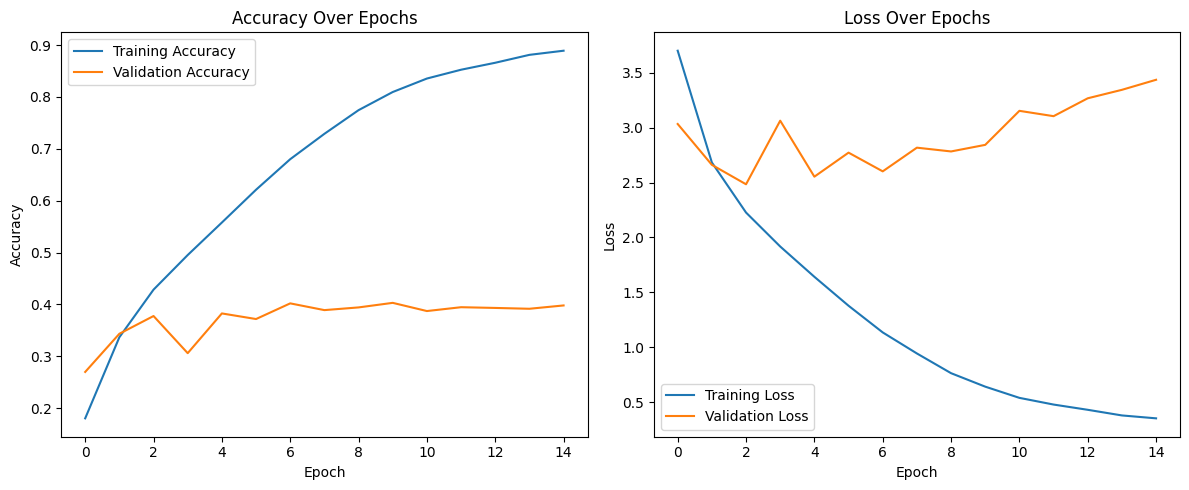

In [14]:
import tensorflow as tf
from keras_tuner import Hyperband, HyperParameters
import matplotlib.pyplot as plt

def build_model(hp):
    input_shape = (32, 32, 3)  # Defining the input shape for CIFAR-100

    # Initializing the model
    model = tf.keras.Sequential()

    # First convolutional layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=64, step=32),
        kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D())

    # Second convolutional layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=128, step=32),
        kernel_size=(3, 3)))
    # Adding LeakyReLU as a separate layer
    if hp.Choice('activation_conv_2', values=['relu', 'leaky_relu', 'tanh']) == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=hp.Float('leaky_relu_alpha_conv_2', min_value=0.1, max_value=0.3, step=0.1)))
    else:
        model.add(tf.keras.layers.Activation(hp.Choice('activation_conv_2', values=['relu', 'tanh'])))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D())

    # Flattening and dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=256, max_value=512, step=256)))
    # Adding LeakyReLU as a separate layer
    if hp.Choice('activation_dense', values=['relu', 'leaky_relu', 'tanh']) == 'leaky_relu':
        model.add(tf.keras.layers.LeakyReLU(alpha=hp.Float('leaky_relu_alpha_dense', min_value=0.1, max_value=0.3, step=0.1)))
    else:
        model.add(tf.keras.layers.Activation(hp.Choice('activation_dense', values=['relu', 'tanh'])))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', min_value=0.3, max_value=0.5, step=0.1)))

    # Output layer
    model.add(tf.keras.layers.Dense(100, activation='softmax'))

    # Compiling the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model


# Function to plot graphs
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Configure and run Keras Tuner
try:
    tuner = Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=3, directory='my_dir', project_name='cifar100_kt')
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    tuner.search(ds_train, epochs=50, validation_data=ds_valid, callbacks=[stop_early])
except Exception as e:
    print(f"An error occurred during hyperparameter search: {e}")

# Build and train the model with the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(ds_train, epochs=15, validation_data=ds_valid)

# Evaluate the model
_, test_acc = model.evaluate(ds_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# Plot accuracy and loss graphs
plot_history(history)


<div style="background-color: #f0f0f0; /* Light gray background */ color: black; /* Black text */ padding: 20px; margin: 20px 0; border-radius: 10px;">

The graphs show the accuracy and loss metrics for a neural network over 15 epochs of training, and you've mentioned that the test accuracy achieved is 40.22%.

**Observations from the graphs:**

1. **Training Accuracy:**
   - There is a sharp increase in training accuracy, which indicates that the model is effectively learning from the training dataset. By the end of the 15 epochs, the training accuracy is approaching 90%, which is quite high.

2. **Validation Accuracy:**
   - The validation accuracy starts off much lower than the training accuracy and remains relatively flat throughout the training process. The large gap between training and validation accuracy suggests that the model may be overfitting to the training data, meaning it's learning features specific to the training set that don't generalize to new, unseen data.

3. **Training Loss:**
   - The training loss decreases rapidly, which is consistent with the increase in training accuracy. This is expected as the model's predictions become more in line with the training data.

4. **Validation Loss:**
   - The validation loss does not show a consistent decrease. After an initial drop, it fluctuates and even trends upwards slightly in later epochs. This again indicates that the model's ability to generalize is not improving and may actually be degrading over time.

**Considering the Test Accuracy:**
- The test accuracy of 40.22% is below the training accuracy, reinforcing the indication that the model is overfitting. It has learned the training data well but is not performing nearly as well on unseen data.

**Actions for Improvement:**
- To address overfitting, consider implementing regularization techniques (like L1, L2, or dropout), using early stopping, or employing more extensive data augmentation.
- Since the model's performance on the validation and test sets is not as high as desired, you might also want to experiment with different model architectures or hyperparameters.
- Another possible action is to review the data to ensure it's properly shuffled and representative of the problem space, and that the validation and test sets are appropriate.

In conclusion, the model's current configuration is very effective for the training set but not as effective for unseen data, indicating that further adjustments are necessary to improve its generalizability.

---
</div>